In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [3]:
data=pd.read_csv('ToyProducts.csv', sep=",")

In [4]:
data.shape

(10000, 17)

In [5]:
data.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                           object
number_available_in_stock                       object
number_of_reviews                               object
number_of_answered_questions                   float64
average_review_rating                           object
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
dtype: object

In [6]:
data.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [7]:
data.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [8]:
total_count=data.shape[0]
print('Всего строк:{}'.format(total_count))

Всего строк:10000


In [9]:
#Обработка пропусков
#Удаление колонок, содержащих пустые значения
data_new1=data.dropna(axis=1, how='any')
(data.shape, data_new1.shape)

((10000, 17), (10000, 2))

In [10]:
#Удаление строк, содержащих пустые значения
data_new2=data.dropna(axis=0, how='any')
(data.shape, data_new2.shape)

((10000, 17), (511, 17))

In [11]:
#Заполнение пропущенных значений нулями
data_new3=data.fillna(0)
data_new3.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,0,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,0,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,0,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,0,0,I love it // 5.0 // 22 July 2013 // By\n \n...,0
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,0,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,0,Birthday present // 5.0 // 14 April 2014 // By...,0


In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка number_of_answered_questions. Тип данных float64. Количество пустых значений 765, 7.65%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,number_of_answered_questions
0,1.0
1,1.0
2,2.0
3,2.0
4,2.0
5,1.0
6,1.0
7,7.0
8,1.0
9,1.0


In [14]:
# Фильтр по пустым значениям поля
data[data['number_of_answered_questions'].isnull()]

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
128,aedf496c4f0594f1814f301db907ffad,Kato N Gauge Train Set Case (Kato PlaRail Mode...,Kato,£11.04,39 new,2,NaN,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Peco-Gauge-Starter-Tra...,Suitable for the following scale(s): N Scale,Technical Details Item Weight494 g Product Dim...,Suitable for the following scale(s): N Scale,http://www.amazon.co.uk/Peco-Gauge-Track-Plans...,NaN,Best protection & organiser for n gauge coach ...,"{""seller""=>[{""Seller_name_1""=>""Santa Trading J..."
199,159b1371be56ec94a1568647669416b3,Smasha Ballz Ninjaaah,Smasha-Ballz,£15.84,6 new,23,NaN,4.4 out of 5 stars,NaN,http://www.amazon.co.uk/Smasha-Ballz-28122-850...,Product Description The Smasha-Ballz have inva...,Technical Details Item Weight458 g Product Dim...,Product Description The Smasha-Ballz have inva...,NaN,NaN,Smasha Ballz - great fun // 5.0 // 5 Oct. 2012...,"{""seller""=>[{""Seller_name_1""=>""GeeTee"", ""Selle..."
200,eb85d6369c891422a89137b0008f1818,Moomins - 6.5 Inch Moominpappa Soft Toy - 20056,Moomins,£7.29,2 new,1,NaN,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Aurora-World-6-5-inch-...,6.5 inch soft toy,Technical Details Item Weight9 g Product Dimen...,6.5 inch soft toy,http://www.amazon.co.uk/Aurora-World-6-5-inch-...,NaN,I love him! // 5.0 // 18 Mar. 2013 // By\n ...,NaN
201,5e9618d43e14edff1c4bb5cce3d1d2d2,Classic Cuddly Paddington Bear by Rainbow Desi...,Paddington Bear,£14.60,21 new,41,NaN,4.5 out of 5 stars,NaN,http://www.amazon.co.uk/Paddington | http://ww...,Please take care of this bear... Cuddly Paddin...,Technical Details Item Weight141 g Product Dim...,Please take care of this bear... Cuddly Paddin...,http://www.amazon.co.uk/Paddington | http://ww...,NaN,One Star // 1.0 // 25 July 2014 // By\n \n ...,NaN
202,42fccdc1368987b8b10486d060504d54,Charlie Bears Rainbow Teddy Bear from the Char...,Charlie Bears,£59.90,3 new,1,NaN,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Charlie-Bears-Rainbow/...,Rainbow is from the 2015 collection,Technical Details Item Weight898 g Product Dim...,Rainbow is from the 2015 collection,http://www.amazon.co.uk/Charlie-Bears-Rainbow/...,NaN,Five Stars // 5.0 // 30 Oct. 2015 // By\n \...,NaN
203,115a5c70a72db6c6007a00b6aeaf59bd,Yoohoo & Friends - Bush Baby with Pink Love He...,Yoohoo & Friends,£6.95,2 new,1,NaN,5.0 out of 5 stars,NaN,NaN,Bush Baby with Pink Love Heart Pink Eyes Plush...,Technical Details Manufacturer recommended age...,Bush Baby with Pink Love Heart Pink Eyes Plush...,NaN,NaN,Five Stars // 5.0 // 16 Jan. 2016 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""stonerlucky"", ""..."
204,f02affe0ff40073cf5b5de05c26f9b7c,Monchhichi 45 cm Classic Boy,Monchhichi,£59.99,3 new,1,NaN,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Monchhichi | http://ww...,Product Description Make friends with this ado...,Technical Details Item Weight1.1 Kg Product Di...,Product Description Make friends with this ado...,http://www.amazon.co.uk/Sekiguchi-255530-Monch...,NaN,Five Stars // 5.0 // 23 April 2015 // By\n ...,NaN
205,52334f0d3aac0840e8585d8fba55e01a,Aurora 5 inch Yoohoo and Friends Beaver,Aurora,£5.99,5 new,5,NaN,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Yoohoo-Friends-Red-Fox...,Product Description YooHoo & Friends are adora...,Technical Details Item Weight82 g Product Dime...,Product Description YooHoo & Friends are adora...,http://www.amazon.co.uk/Aurora-inch-Yoohoo-Fri...,NaN,great // 5.0 // 27 Dec. 2012 // By\n \n ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
206,89d45506cb2dc4e010df9c2bab1c9c89,The Puppet Company - Finger Puppets - Silverba...,The Puppet Company,£

In [15]:

# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['number_of_answered_questions'].isnull()].index
flt_index

Int64Index([ 128,  199,  200,  201,  202,  203,  204,  205,  206,  207,
            ...
            9797, 9798, 9799, 9957, 9958, 9959, 9960, 9961, 9962, 9963],
           dtype='int64', length=765)

In [16]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
128,aedf496c4f0594f1814f301db907ffad,Kato N Gauge Train Set Case (Kato PlaRail Mode...,Kato,£11.04,39 new,2,NaN,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Peco-Gauge-Starter-Tra...,Suitable for the following scale(s): N Scale,Technical Details Item Weight494 g Product Dim...,Suitable for the following scale(s): N Scale,http://www.amazon.co.uk/Peco-Gauge-Track-Plans...,NaN,Best protection & organiser for n gauge coach ...,"{""seller""=>[{""Seller_name_1""=>""Santa Trading J..."
199,159b1371be56ec94a1568647669416b3,Smasha Ballz Ninjaaah,Smasha-Ballz,£15.84,6 new,23,NaN,4.4 out of 5 stars,NaN,http://www.amazon.co.uk/Smasha-Ballz-28122-850...,Product Description The Smasha-Ballz have inva...,Technical Details Item Weight458 g Product Dim...,Product Description The Smasha-Ballz have inva...,NaN,NaN,Smasha Ballz - great fun // 5.0 // 5 Oct. 2012...,"{""seller""=>[{""Seller_name_1""=>""GeeTee"", ""Selle..."
200,eb85d6369c891422a89137b0008f1818,Moomins - 6.5 Inch Moominpappa Soft Toy - 20056,Moomins,£7.29,2 new,1,NaN,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Aurora-World-6-5-inch-...,6.5 inch soft toy,Technical Details Item Weight9 g Product Dimen...,6.5 inch soft toy,http://www.amazon.co.uk/Aurora-World-6-5-inch-...,NaN,I love him! // 5.0 // 18 Mar. 2013 // By\n ...,NaN
201,5e9618d43e14edff1c4bb5cce3d1d2d2,Classic Cuddly Paddington Bear by Rainbow Desi...,Paddington Bear,£14.60,21 new,41,NaN,4.5 out of 5 stars,NaN,http://www.amazon.co.uk/Paddington | http://ww...,Please take care of this bear... Cuddly Paddin...,Technical Details Item Weight141 g Product Dim...,Please take care of this bear... Cuddly Paddin...,http://www.amazon.co.uk/Paddington | http://ww...,NaN,One Star // 1.0 // 25 July 2014 // By\n \n ...,NaN
202,42fccdc1368987b8b10486d060504d54,Charlie Bears Rainbow Teddy Bear from the Char...,Charlie Bears,£59.90,3 new,1,NaN,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Charlie-Bears-Rainbow/...,Rainbow is from the 2015 collection,Technical Details Item Weight898 g Product Dim...,Rainbow is from the 2015 collection,http://www.amazon.co.uk/Charlie-Bears-Rainbow/...,NaN,Five Stars // 5.0 // 30 Oct. 2015 // By\n \...,NaN
203,115a5c70a72db6c6007a00b6aeaf59bd,Yoohoo & Friends - Bush Baby with Pink Love He...,Yoohoo & Friends,£6.95,2 new,1,NaN,5.0 out of 5 stars,NaN,NaN,Bush Baby with Pink Love Heart Pink Eyes Plush...,Technical Details Manufacturer recommended age...,Bush Baby with Pink Love Heart Pink Eyes Plush...,NaN,NaN,Five Stars // 5.0 // 16 Jan. 2016 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""stonerlucky"", ""..."
204,f02affe0ff40073cf5b5de05c26f9b7c,Monchhichi 45 cm Classic Boy,Monchhichi,£59.99,3 new,1,NaN,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Monchhichi | http://ww...,Product Description Make friends with this ado...,Technical Details Item Weight1.1 Kg Product Di...,Product Description Make friends with this ado...,http://www.amazon.co.uk/Sekiguchi-255530-Monch...,NaN,Five Stars // 5.0 // 23 April 2015 // By\n ...,NaN
205,52334f0d3aac0840e8585d8fba55e01a,Aurora 5 inch Yoohoo and Friends Beaver,Aurora,£5.99,5 new,5,NaN,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Yoohoo-Friends-Red-Fox...,Product Description YooHoo & Friends are adora...,Technical Details Item Weight82 g Product Dime...,Product Description YooHoo & Friends are adora...,http://www.amazon.co.uk/Aurora-inch-Yoohoo-Fri...,NaN,great // 5.0 // 27 Dec. 2012 // By\n \n ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
206,89d45506cb2dc4e010df9c2bab1c9c89,The Puppet Company - Finger Puppets - Silverba...,The Puppet Company,£

In [17]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['number_of_answered_questions']

128    NaN
199    NaN
200    NaN
201    NaN
202    NaN
203    NaN
204    NaN
205    NaN
206    NaN
207    NaN
208    NaN
209    NaN
210    NaN
211    NaN
212    NaN
213    NaN
214    NaN
215    NaN
216    NaN
399    NaN
400    NaN
401    NaN
402    NaN
403    NaN
404    NaN
405    NaN
597    NaN
598    NaN
599    NaN
600    NaN
        ..
9640   NaN
9641   NaN
9642   NaN
9643   NaN
9781   NaN
9782   NaN
9783   NaN
9784   NaN
9785   NaN
9786   NaN
9787   NaN
9788   NaN
9789   NaN
9790   NaN
9791   NaN
9792   NaN
9793   NaN
9794   NaN
9795   NaN
9796   NaN
9797   NaN
9798   NaN
9799   NaN
9957   NaN
9958   NaN
9959   NaN
9960   NaN
9961   NaN
9962   NaN
9963   NaN
Name: number_of_answered_questions, Length: 765, dtype: float64

In [18]:
data_num_number_of_answered_questions = data_num[['number_of_answered_questions']]
data_num_number_of_answered_questions.head()

,number_of_answered_questions
0,1.0
1,1.0
2,2.0
3,2.0
4,2.0


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
 

In [20]:
import sklearn
sklearn.__version__

'0.20.1'

In [21]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_number_of_answered_questions)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [22]:

strategies=['mean', 'median','most_frequent']

In [23]:

def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_number_of_answered_questions)
    return data_num_imp[mask_missing_values_only]

In [24]:
strategies[0], test_num_impute(strategies[0])

('mean', array([1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.83497564, 1.83497564, 1.83497564,
        1.83497564, 1.83497564, 1.834975

In [25]:

strategies[1], test_num_impute(strategies[1])

('median',
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
 

In [26]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [27]:

# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [28]:
data[['number_of_answered_questions']].describe()

,number_of_answered_questions
count,9235.000000
mean,1.834976
std,2.517268
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,39.000000


In [29]:
test_num_impute_col(data, 'number_of_answered_questions', strategies[0])

('number_of_answered_questions',
 'mean',
 765,
 1.8349756361667569,
 1.8349756361667569)

In [30]:
test_num_impute_col(data, 'number_of_answered_questions', strategies[1])

('number_of_answered_questions', 'median', 765, 1.0, 1.0)

In [31]:

test_num_impute_col(data, 'number_of_answered_questions', strategies[2])

('number_of_answered_questions', 'most_frequent', 765, 1.0, 1.0)

In [ ]:
Обработка пропусков в категориальных данных

In [32]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка manufacturer. Тип данных object. Количество пустых значений 7, 0.07%.
Колонка price. Тип данных object. Количество пустых значений 1435, 14.35%.
Колонка number_available_in_stock. Тип данных object. Количество пустых значений 2500, 25.0%.
Колонка number_of_reviews. Тип данных object. Количество пустых значений 18, 0.18%.
Колонка average_review_rating. Тип данных object. Количество пустых значений 18, 0.18%.
Колонка amazon_category_and_sub_category. Тип данных object. Количество пустых значений 690, 6.9%.
Колонка customers_who_bought_this_item_also_bought. Тип данных object. Количество пустых значений 1062, 10.62%.
Колонка description. Тип данных object. Количество пустых значений 651, 6.51%.
Колонка product_information. Тип данных object. Количество пустых значений 58, 0.58%.
Колонка product_description. Тип данных object. Количество пустых значений 651, 6.51%.
Колонка items_customers_buy_after_viewing_this_item. Тип данных object. Количество пустых значений 3065, 30.65%.
Колон

In [33]:
cat_temp_data = data[['number_of_reviews']]
cat_temp_data.head()

,number_of_reviews
0,15
1,2
2,17
3,1
4,3


In [34]:
cat_temp_data['number_of_reviews'].unique()

array(['15', '2', '17', '1', '3', '36', '8', '21', '4', '5', '19', '53',
       '6', '38', '10', '7', nan, '9', '13', '18', '97', '28', '12', '67',
       '81', '23', '41', '11', '16', '45', '42', '32', '27', '40', '31',
       '35', '29', '120', '33', '26', '24', '85', '25', '43', '138', '82',
       '46', '14', '72', '22', '106', '76', '420', '160', '39', '30',
       '199', '129', '56', '291', '87', '86', '20', '34', '142', '92',
       '55', '64', '77', '243', '130', '68', '253', '101', '102', '122',
       '73', '118', '145', '381', '802', '299', '59', '518', '158', '44',
       '98', '58', '47', '600', '57', '50', '78', '94', '51', '37', '210',
       '165', '103', '185', '116', '149', '168', '71', '649', '265',
       '355', '79', '100', '83', '61', '48', '70', '65', '49', '54', '66',
       '60', '238', '133', '88', '110', '117', '109', '127', '63', '111',
       '141', '99', '204', '124', '95', '220', '137', '90', '172', '134',
       '115', '80', '91', '125', '119', '131', '1

In [35]:
cat_temp_data[cat_temp_data['number_of_reviews'].isnull()].shape

(18, 1)

In [36]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['15'],
       ['2'],
       ['17'],
       ...,
       ['1'],
       ['1'],
       ['11']], dtype=object)

In [37]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['1', '1,040', '1,399', '10', '100', '101', '102', '103', '104',
       '105', '106', '107', '108', '109', '11', '110', '111', '112',
       '113', '114', '115', '116', '117', '118', '119', '12', '120',
       '122', '123', '124', '125', '126', '127', '128', '129', '13',
       '130', '131', '132', '133', '134', '136', '137', '138', '139',
       '14', '140', '141', '142', '144', '145', '146', '147', '149', '15',
       '151', '155', '156', '158', '16', '160', '164', '165', '168', '17',
       '172', '177', '18', '181', '183', '185', '19', '193', '199', '2',
       '20', '200', '202', '204', '21', '210', '22', '220', '23', '230',
       '238', '24', '241', '243', '249', '25', '253', '26', '262', '263',
       '265', '27', '28', '287', '29', '291', '299', '3', '30', '304',
       '31', '313', '32', '33', '337', '34', '35', '355', '36', '37',
       '379', '38', '381', '39', '4', '40', '41', '42', '420', '43', '44',
       '45', '46', '47', '48', '49', '5', '50', '51', '512', '516'

In [38]:

# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['15'],
       ['2'],
       ['17'],
       ...,
       ['1'],
       ['1'],
       ['11']], dtype=object)

In [39]:
np.unique(data_imp3)

array(['!!!', '1', '1,040', '1,399', '10', '100', '101', '102', '103',
       '104', '105', '106', '107', '108', '109', '11', '110', '111',
       '112', '113', '114', '115', '116', '117', '118', '119', '12',
       '120', '122', '123', '124', '125', '126', '127', '128', '129',
       '13', '130', '131', '132', '133', '134', '136', '137', '138',
       '139', '14', '140', '141', '142', '144', '145', '146', '147',
       '149', '15', '151', '155', '156', '158', '16', '160', '164', '165',
       '168', '17', '172', '177', '18', '181', '183', '185', '19', '193',
       '199', '2', '20', '200', '202', '204', '21', '210', '22', '220',
       '23', '230', '238', '24', '241', '243', '249', '25', '253', '26',
       '262', '263', '265', '27', '28', '287', '29', '291', '299', '3',
       '30', '304', '31', '313', '32', '33', '337', '34', '35', '355',
       '36', '37', '379', '38', '381', '39', '4', '40', '41', '42', '420',
       '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '512'

In [41]:
data_imp3[data_imp3=='!!!'].size

18

Преобразование категориальных признаков в числовые

In [42]:

cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,15
1,2
2,17
3,1
4,3
5,2
6,2
7,36
8,1
9,8


Кодирование категорий целочисленными значениями - label encoding

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [44]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [45]:
cat_enc['c1'].unique()

array(['15', '2', '17', '1', '3', '36', '8', '21', '4', '5', '19', '53',
       '6', '38', '10', '7', '9', '13', '18', '97', '28', '12', '67',
       '81', '23', '41', '11', '16', '45', '42', '32', '27', '40', '31',
       '35', '29', '120', '33', '26', '24', '85', '25', '43', '138', '82',
       '46', '14', '72', '22', '106', '76', '420', '160', '39', '30',
       '199', '129', '56', '291', '87', '86', '20', '34', '142', '92',
       '55', '64', '77', '243', '130', '68', '253', '101', '102', '122',
       '73', '118', '145', '381', '802', '299', '59', '518', '158', '44',
       '98', '58', '47', '600', '57', '50', '78', '94', '51', '37', '210',
       '165', '103', '185', '116', '149', '168', '71', '649', '265',
       '355', '79', '100', '83', '61', '48', '70', '65', '49', '54', '66',
       '60', '238', '133', '88', '110', '117', '109', '127', '63', '111',
       '141', '99', '204', '124', '95', '220', '137', '90', '172', '134',
       '115', '80', '91', '125', '119', '131', '146', 

In [46]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [47]:
le.inverse_transform([0, 1, 2, 3])

array(['1', '1,040', '1,399', '10'], dtype=object)

Кодирование категорий наборами бинарных значений - one-hot encoding

In [48]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [49]:
cat_enc.shape

(10000, 1)

In [50]:
cat_enc_ohe.shape

(10000, 194)

In [51]:

cat_enc_ohe

<10000x194 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [52]:

cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [53]:

cat_enc.head(10)

,c1
0,15
1,2
2,17
3,1
4,3
5,2
6,2
7,36
8,1
9,8


Pandas get_dummies - быстрый вариант one-hot кодирования

In [54]:
pd.get_dummies(cat_enc).head()

,c1_1,"c1_1,040","c1_1,399",c1_10,c1_100,c1_101,c1_102,c1_103,c1_104,c1_105,...,c1_90,c1_91,c1_92,c1_93,c1_94,c1_95,c1_96,c1_97,c1_98,c1_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,number_of_reviews_1,"number_of_reviews_1,040","number_of_reviews_1,399",number_of_reviews_10,number_of_reviews_100,number_of_reviews_101,number_of_reviews_102,number_of_reviews_103,number_of_reviews_104,number_of_reviews_105,...,number_of_reviews_91,number_of_reviews_92,number_of_reviews_93,number_of_reviews_94,number_of_reviews_95,number_of_reviews_96,number_of_reviews_97,number_of_reviews_98,number_of_reviews_99,number_of_reviews_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Масштабирование данных

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [57]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['number_of_answered_questions']])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


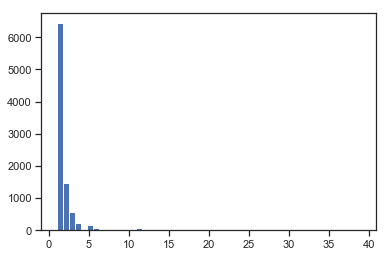

In [58]:

plt.hist(data['number_of_answered_questions'], 50)
plt.show()

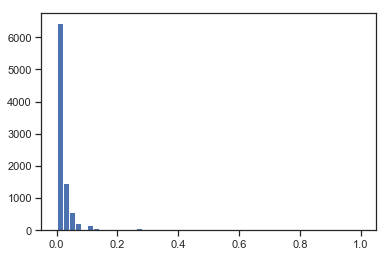

In [59]:
plt.hist(sc1_data, 50)
plt.show()

Масштабирование данных на основе Z-оценки - StandardScaler

In [61]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['number_of_answered_questions']])

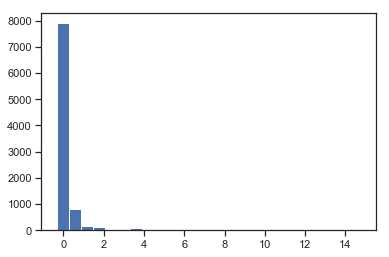

In [64]:
plt.hist(sc2_data, 25)
plt.show()